In [1]:
import torch  # 导入PyTorch库
from torch import nn  # 从PyTorch库中导入神经网络模块
from d2l import torch as d2l  # 从d2l（动手学深度学习）库中导入torch模块，并重命名为d2l

# 定义一个神经网络模型，使用nn.Sequential按顺序构建网络
net = nn.Sequential(
    # 第一个卷积层（Conv2d）
    # 这里使用一个11*11的更大卷积窗口来捕捉对象。
    # 同时，步幅（stride）为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目（channels）设为96，远大于LeNet（一个早期的卷积神经网络）。
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),  # Conv2d: 卷积层 (convolutional layer)
    nn.ReLU(),  # ReLU：整流线性单元（Rectified Linear Unit，激活函数）
    
    # 第一个池化层（MaxPool2d）
    # 使用3*3的最大池化窗口，步幅为2，减小特征图的尺寸。
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool2d: 最大池化层 (Max Pooling Layer)
    
    # 第二个卷积层（Conv2d）
    # 减小卷积窗口至5*5，使用填充为2来保持输入输出的高度和宽度一致，输出通道数增加至256。
    nn.Conv2d(96, 256, kernel_size=5, padding=2),  # Conv2d: 卷积层
    nn.ReLU(),  # 激活函数ReLU
    
    # 第二个池化层（MaxPool2d）
    # 使用3*3的最大池化窗口，步幅为2，再次减小特征图的尺寸。
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool2d: 最大池化层
    
    # 第三个卷积层（Conv2d）
    # 使用3*3的卷积窗口，保持输入输出的高度和宽度一致，输出通道数为384。
    nn.Conv2d(256, 384, kernel_size=3, padding=1),  # Conv2d: 卷积层
    nn.ReLU(),  # 激活函数ReLU
    
    # 第四个卷积层（Conv2d）
    # 再次使用3*3的卷积窗口，保持输入输出的尺寸一致，输出通道数为384。
    nn.Conv2d(384, 384, kernel_size=3, padding=1),  # Conv2d: 卷积层
    nn.ReLU(),  # 激活函数ReLU
    
    # 第五个卷积层（Conv2d）
    # 最后一个卷积层，输出通道数为256，卷积窗口仍为3*3，保持尺寸不变。
    nn.Conv2d(384, 256, kernel_size=3, padding=1),  # Conv2d: 卷积层
    nn.ReLU(),  # 激活函数ReLU
    
    # 第三个池化层（MaxPool2d）
    # 使用3*3的最大池化窗口，步幅为2，进一步减小特征图尺寸。
    nn.MaxPool2d(kernel_size=3, stride=2),  # MaxPool2d: 最大池化层
    
    # 扁平化层（Flatten）
    # 将多维的卷积输出展平为一维向量，用于后续的全连接层。
    nn.Flatten(),  # Flatten: 展平层
    
    # 第一个全连接层（Linear）
    # 输入为6400个节点，输出为4096个节点。使用ReLU激活函数。
    nn.Linear(6400, 4096),  # Linear: 全连接层 (Fully Connected Layer)
    nn.ReLU(),  # 激活函数ReLU
    
    # 第一个Dropout层
    # 随机丢弃50%的节点，减少过拟合。
    nn.Dropout(p=0.5),  # Dropout: 随机失活层 (Dropout Layer)
    
    # 第二个全连接层（Linear）
    # 输入和输出均为4096个节点，使用ReLU激活函数。
    nn.Linear(4096, 4096),  # Linear: 全连接层
    nn.ReLU(),  # 激活函数ReLU
    
    # 第二个Dropout层
    # 同样丢弃50%的节点，进一步防止过拟合。
    nn.Dropout(p=0.5),  # Dropout: 随机失活层
    
    # 输出层（Linear）
    # 最后输出10个类别的预测结果，因使用的是Fashion-MNIST数据集（10个类别），而非原始论文中的1000个类别。
    nn.Linear(4096, 10)  # Linear: 全连接层
)


In [2]:
# 生成一个形状为(1, 1, 224, 224)的随机张量，作为网络的输入。
# torch.randn: 生成标准正态分布的随机数张量
# X: 输入张量 (Input Tensor)
X = torch.randn(1, 1, 224, 224)  # 1个样本, 1个通道, 高度224, 宽度224

# 通过网络的每一层，逐层将输入张量X传递下去。
# net: 神经网络模型 (Neural Network Model)
for layer in net:
    # 将当前的X输入到网络中的一层 (layer) 中，并得到输出X。
    # layer: 网络中的一层 (Layer in Network)
    X = layer(X)  # 输入经过网络层后的张量 (Tensor after passing through a layer)
    
    # 打印当前层的类型（类名）以及该层输出的张量形状。
    # __class__.__name__: 获取当前层的类名 (Get the class name of the current layer)
    # X.shape: 张量的形状 (Shape of the Tensor)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)  # 打印层的名称和输出张量的形状


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [3]:

batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

KeyboardInterrupt: 

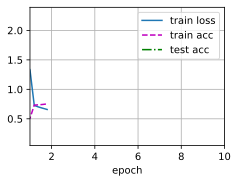

In [4]:
lr, num_epochs = 0.01, 10# 学习率调的比较低
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())